# Three observable trends based on the Pyber data:
- It is a largely Urban mode of transportation; Urban travel contributed to:
     - 62.7% of Total Fares
     - 80.9% of Total Drivers
     - 68.4% of Total Rides
- Fares are less frequent and more expensive for Rural use compared to Suburban and Urban transit
- Urban usage contributes more rides, fares to Totals but overall but average fares are lower compared to Rural, Suburban usage


In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
# Read the City and Ride Data
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(ride_data_to_load, city_data_to_load, on="city")

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [3]:
# Display the data table for preview
combined_data.reset_index
# combined_data.groupby(['city'])
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
urban = combined_data[combined_data['type']=='Urban']
rural = combined_data[combined_data['type']=='Rural']
suburban = combined_data[combined_data['type']=='Suburban']

In [5]:
# Obtain the x and y coordinates for each of the three city types
x_axis_r = rural['city'].value_counts(sort='city')
y_axis_r = rural.groupby(['city'])['fare'].mean()
driver_ct_r = rural.groupby(['city'])['driver_count'].mean()

x_axis_u = urban['city'].value_counts(sort='city')
y_axis_u = urban.groupby(['city'])['fare'].mean()
driver_ct_u = urban.groupby(['city'])['driver_count'].mean()

x_axis_s = suburban['city'].value_counts(sort='city')
y_axis_s = suburban.groupby(['city'])['fare'].mean()
driver_ct_s = suburban.groupby(['city'])['driver_count'].mean()

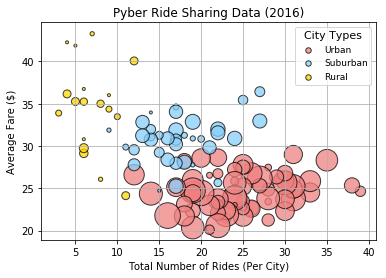

In [6]:
# Build the scatter plots for each city types
plt.scatter(x_axis_u, y_axis_u, marker="o",facecolors="lightcoral", 
            edgecolors="black", s=driver_ct_u*9, label="Urban", alpha=0.75)
plt.scatter(x_axis_s, y_axis_s, marker="o", facecolors="lightskyblue", 
            edgecolors="black", s=driver_ct_s*9, label="Suburban", alpha=0.75)
plt.scatter(x_axis_r, y_axis_r, marker="o", facecolors="gold", 
            edgecolors="black", s=driver_ct_r*9, label="Rural", alpha=0.75)
# Incorporate the other graph properties
plt.grid()
# Create a legend
lgnd = plt.legend(loc='best', fontsize=9, title='City Types', title_fontsize=11)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Save Figure
plt.savefig("PyRideShareData.png")

## Total Fares by City Type

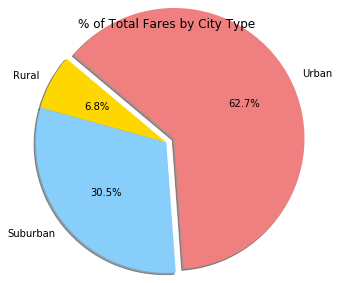

In [7]:
# Calculate Type Percents
total_fares = combined_data['fare'].sum()

# Rural        4327.93
total_rural = rural['fare'].sum()
pct_rural = total_rural/total_fares

# Urban       39854.38
total_urban = urban['fare'].sum()
pct_urban = total_urban/total_fares

# Suburban    19356.33
total_suburb = suburban['fare'].sum()
pct_suburb = total_suburb/total_fares

# Build Pie Chart
pcts = [pct_rural, pct_suburb, pct_urban]

explode = (0, 0, 0.1)

labels = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

plt.title("% of Total Fares by City Type")
plt.pie(pcts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius=1.5)

# Save Figure
                # import matplotlib.figure as fig
                # fig.Figure(figsize=[3, 8])
plt.savefig("PctFareCity.png")

# Show Figure
plt.show()

## Total Rides by City Type

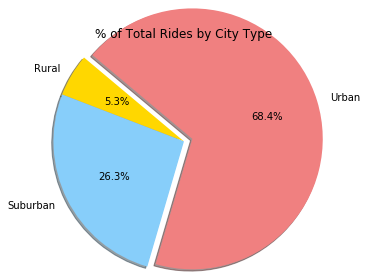

In [8]:
# Calculate Ride Percents
total_rides = combined_data['type'].count()

# Rural        125
rides_rural = rural['type'].count()
per_rural = rides_rural/total_rides

# Urban       1625
rides_urban = urban['type'].count()
per_urban = rides_urban/total_rides

# Suburban     625
rides_suburb = suburban['type'].count()
per_suburb = rides_suburb/total_rides

# Build Pie Chart
pcts = [per_rural, per_suburb, per_urban]

explode = (0, 0, 0.1)

labels = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

plt.title("% of Total Rides by City Type", fontdict={'verticalalignment':'top'})
plt.pie(pcts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius=1.5)

# Save Figure
plt.savefig("TotalRidesCity.png")
# Show Figure
plt.show()

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

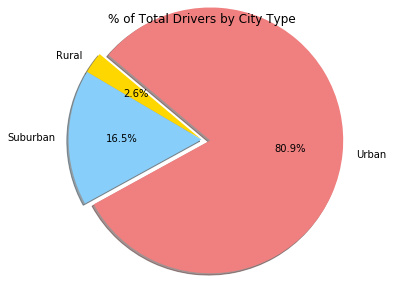

In [10]:
# Calculate Driver Percents
total_drive = city_data_to_load['driver_count'].sum()
# Total = 2973

# Rural        78
drive_rural = driver_ct_r.sum()
ptg_rural = drive_rural/total_drive

# Urban       2405
drive_urban = driver_ct_u.sum()
ptg_urban = drive_urban/total_drive

# Suburban    490
drive_suburb = driver_ct_s.sum()
ptg_suburb = drive_suburb/total_drive

# Build Pie Charts
pcts = [ptg_rural, ptg_suburb, ptg_urban]

explode = (0, 0, 0.1)

labels = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

plt.title("% of Total Drivers by City Type")
plt.pie(pcts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius=1.5)
plt.tight_layout()
# Save Figure
plt.savefig("TotalDriversCity.png")
# Show Figure

plt.show()

In [16]:
# Printout of results
print("% of Total Drivers: Urban: " +
      str(ptg_urban*100) + "; Suburban: " + 
      str(ptg_suburb*100) + "; Rural: " + 
      str(ptg_rural*100) +".")
print("% of Total Rides: Urban: " + 
      str(per_urban*100) +  "; Suburban: " + 
      str(per_suburb*100) + "; Rural: " + 
      str(per_rural*100) + ".")
print("% of Total Fares " +
      str(pct_urban*100) + "; Suburban: " + 
      str(pct_suburb*100) + "; Rural: " + 
      str(pct_rural*100) + ".")

% of Total Drivers: Urban: 80.89471913891691; Suburban: 16.481668348469558; Rural: 2.6236125126135215.
% of Total Rides: Urban: 68.42105263157895; Suburban: 26.31578947368421; Rural: 5.263157894736842.
% of Total Fares 62.72463496228436; Suburban: 30.46387206273222; Rural: 6.81149297498341.
